In [1]:
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

# Import Data

In [2]:
# import data from datareader
bb = data.DataReader(
    name = 'BB',
    data_source = 'yahoo',
    start = '2007-01-01',
    end = '2020-12-31'
)

bb.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-01-03,44.026669,41.703335,43.086666,42.849998,34739100.0,42.849998
2007-01-04,46.316666,42.423332,42.953335,46.189999,46007700.0,46.189999
2007-01-05,47.306667,45.166668,45.500000,47.099998,41453400.0,47.099998
2007-01-08,48.410000,46.606667,47.283333,47.386665,38547300.0,47.386665
2007-01-09,47.666668,43.263332,47.570000,43.666668,74142000.0,43.666668


# Line Chart

<AxesSubplot:xlabel='Date'>

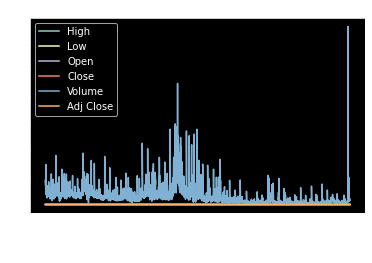

In [3]:
# simple plot
# this will target all columns which is not always ideal
bb.plot() # default kind = 'line'

<AxesSubplot:xlabel='Date'>

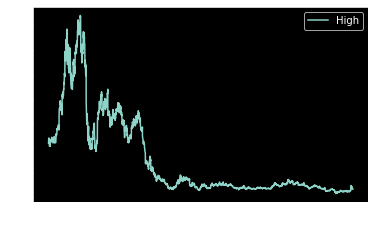

In [4]:
# line chart with specified column
bb.plot(y = 'High')

<AxesSubplot:xlabel='Date'>

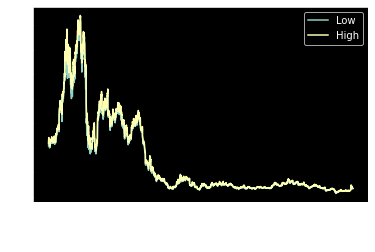

In [5]:
# line chart with specified columns
bb.plot(y = ['Low', 'High'])

# Customizing Plots w/ Templates

In [6]:
# display style themes
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [7]:
# apply theme (only have to apply once, unless you want to use different themes)
# you can create your own custom themes
plt.style.use('seaborn')

<AxesSubplot:xlabel='Date'>

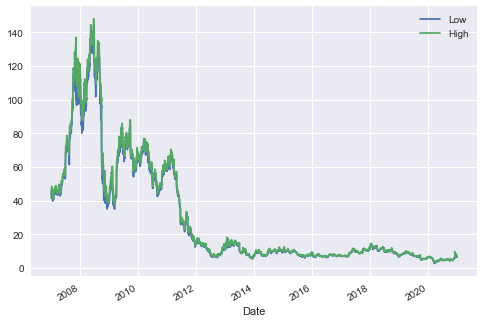

In [8]:
# line chart with specified theme (above)
bb.plot(y = ['Low', 'High'])

# Bar Charts

In [9]:
# creating categories with a function
def rank_performance(stock_price):
    if stock_price <= 10:
        return 'Low'
    elif stock_price <= 50:
        return 'Medium'
    else:
        return 'High'

In [10]:
# apply categories to series and display value counts
bb_close_categories = bb['Close'].apply(rank_performance).value_counts()
bb_close_categories

Low       1541
Medium    1125
High       859
Name: Close, dtype: int64

<AxesSubplot:>

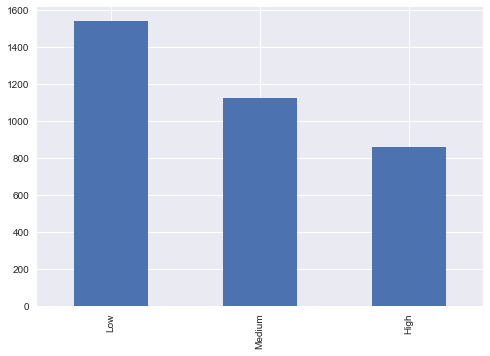

In [11]:
# plot vertical bar chart
bb_close_categories.plot(kind = 'bar')

<AxesSubplot:>

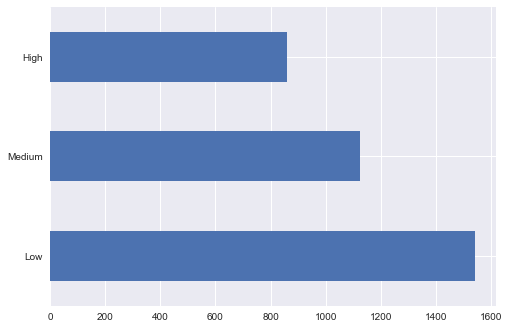

In [12]:
# plot horizonal bar chart
bb_close_categories.plot(kind = 'barh')

# Pie Chart

In [13]:
# create proportions with a function
bb_mean = bb['Close'].mean() 

def rank_proportions(stock_price):
    if stock_price >= bb_mean:
        return 'Above Average'
    else:
        return 'Below Average'

In [14]:
# apply proportions to series and display value counts
bb_close_proportions = bb['Close'].apply(rank_proportions).value_counts()
bb_close_proportions

Below Average    2388
Above Average    1137
Name: Close, dtype: int64

<AxesSubplot:ylabel='Close'>

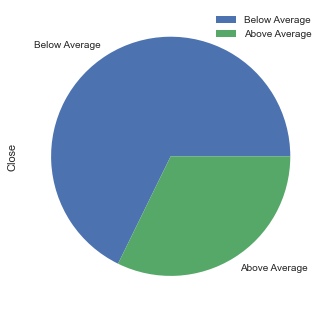

In [15]:
# plot pie chart
bb_close_proportions.plot(kind = 'pie', legend = True)